# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Analysis

In [2]:
df=pd.read_csv("burnoutdata.csv")
df.head()

,Employee ID,Date of Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
#shape of the data
df.shape

(22750, 9)

In [4]:
#some more info regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company_Type          22750 non-null  object 
 4   WFH_Setup_Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource_Allocation   21369 non-null  float64
 7   Mental_Fatigue_Score  20633 non-null  float64
 8   Burn_Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [5]:
#converting the date time 
df['Date of Joining']=pd.to_datetime(df['Date of Joining'])
df

,Employee ID,Date of Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [6]:
#checking missing values
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company_Type               0
WFH_Setup_Available        0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64

In [7]:
#getting statistical measures  of data
df.describe()

,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [8]:
df['Gender'].value_counts()

Female    11908
Male      10842
Name: Gender, dtype: int64

In [9]:
df['Company_Type'].value_counts()

Service    14833
Product     7917
Name: Company_Type, dtype: int64

In [11]:
df['WFH_Setup_Available'].value_counts()

Yes    12290
No     10460
Name: WFH_Setup_Available, dtype: int64

In [12]:
df['Designation'].value_counts()

2.0    7588
3.0    5985
1.0    4881
4.0    2391
0.0    1507
5.0     398
Name: Designation, dtype: int64

In [13]:
df['Resource_Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource_Allocation, dtype: int64

In [14]:
df['Mental_Fatigue_Score'].value_counts()

6.0    470
5.8    464
5.9    458
6.1    457
6.3    454
      ... 
0.5     24
0.2     23
0.4     19
0.1     17
0.3     13
Name: Mental_Fatigue_Score, Length: 101, dtype: int64

In [16]:
#Filling the missing values
df['Resource_Allocation'].fillna(df['Resource_Allocation'].mean(),inplace=True)
df['Mental_Fatigue_Score'].fillna(df['Mental_Fatigue_Score'].mean(),inplace=True)
df['Burn_Rate'].fillna(df['Burn_Rate'].mean(),inplace=True)


In [17]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company_Type            0
WFH_Setup_Available     0
Designation             0
Resource_Allocation     0
Mental_Fatigue_Score    0
Burn_Rate               0
dtype: int64

# Data Visualization

Palette


supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


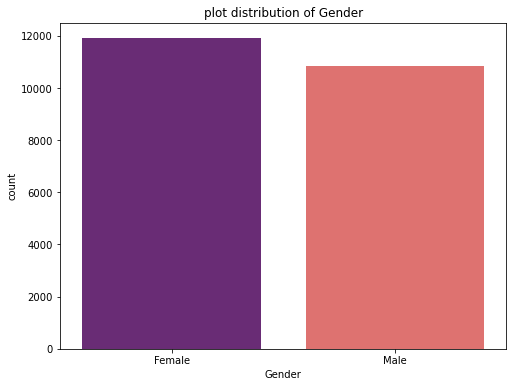

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=df,palette='magma')
plt.title("plot distribution of Gender")
plt.show()

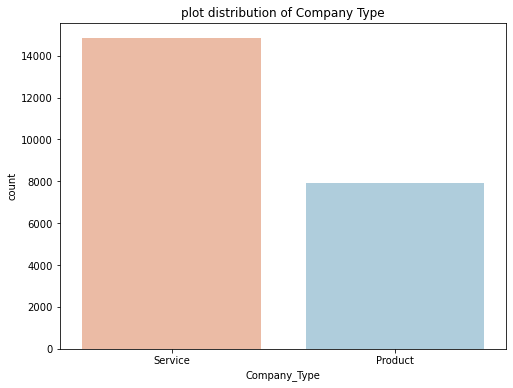

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='Company_Type',data=df,palette='RdBu')
plt.title("plot distribution of Company Type")
plt.show()

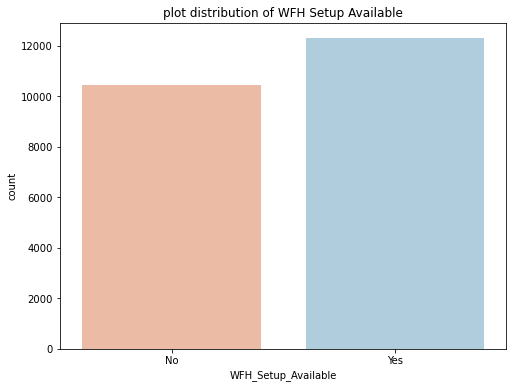

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='WFH_Setup_Available',data=df,palette='RdBu')
plt.title("plot distribution of WFH Setup Available")
plt.show()

count    22750.000000
mean         2.178725
std          1.135145
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Designation, dtype: float64


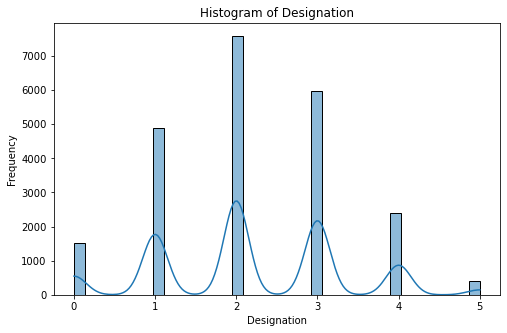

In [21]:
# Select the numerical column to analyze
numerical_column = "Designation"  

# Descriptive statistics
print(df[numerical_column].describe())

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()


count    22750.000000
mean         4.481398
std          1.984099
min          1.000000
25%          3.000000
50%          4.481398
75%          6.000000
max         10.000000
Name: Resource_Allocation, dtype: float64


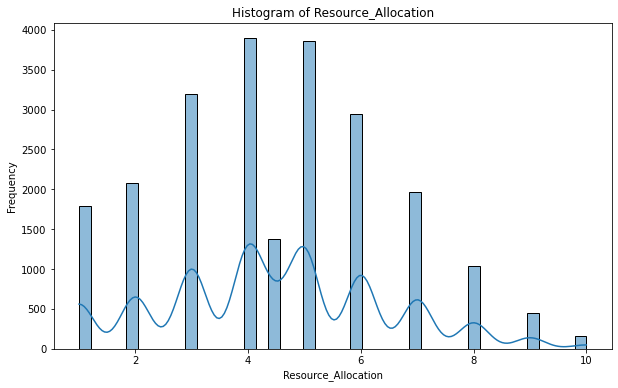

In [22]:
# Select the numerical column to analyze
numerical_column = "Resource_Allocation"  

# Descriptive statistics
print(df[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()


count    22750.000000
mean         5.728188
std          1.829281
min          0.000000
25%          4.700000
50%          5.728188
75%          6.900000
max         10.000000
Name: Mental_Fatigue_Score, dtype: float64


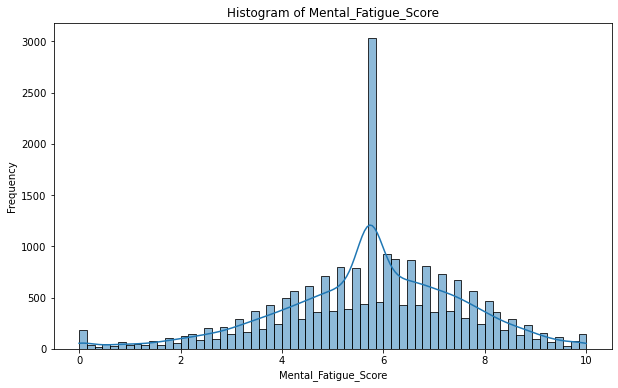

In [23]:
# Select the numerical column to analyze
numerical_column = "Mental_Fatigue_Score"  

# Descriptive statistics
print(df[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()


count    22750.000000
mean         0.452005
std          0.193267
min          0.000000
25%          0.320000
50%          0.452005
75%          0.580000
max          1.000000
Name: Burn_Rate, dtype: float64


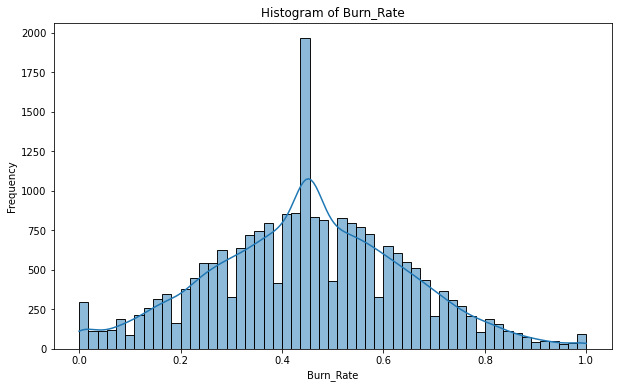

In [24]:
# Select the numerical column to analyze
numerical_column = "Burn_Rate"  

# Descriptive statistics
print(df[numerical_column].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=numerical_column, kde=True)
plt.title("Histogram of " + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show()


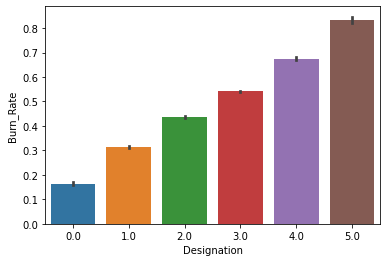

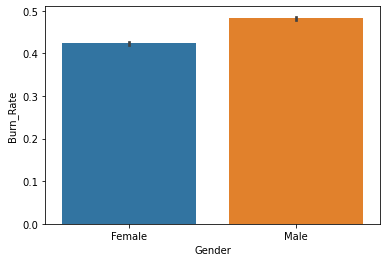

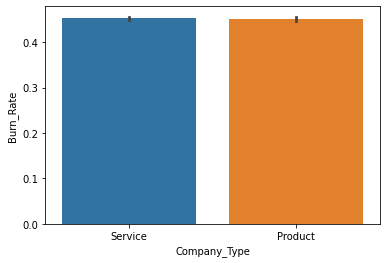

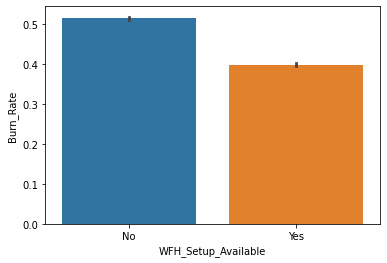

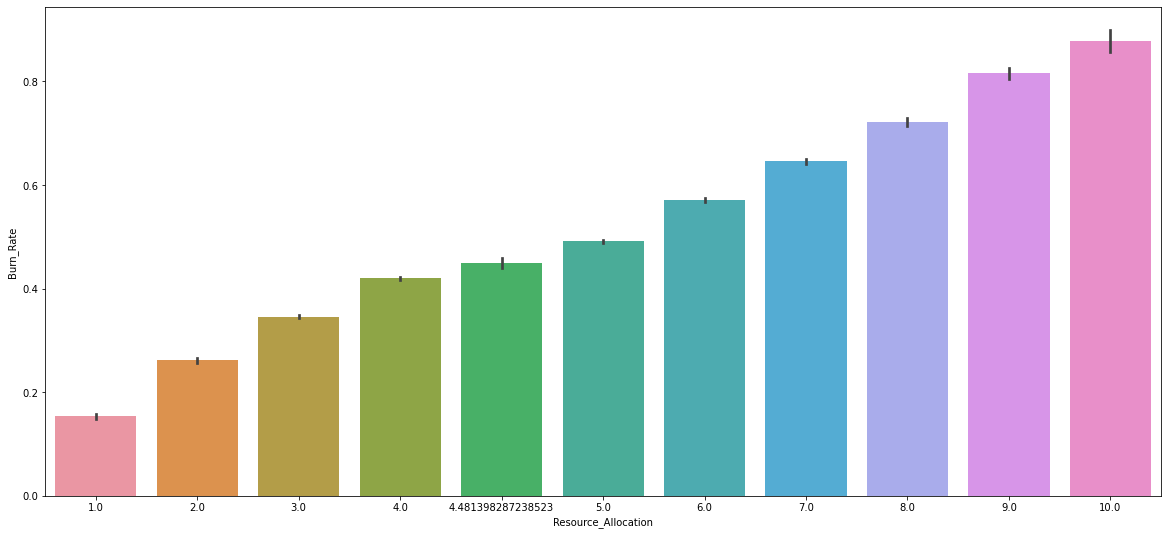

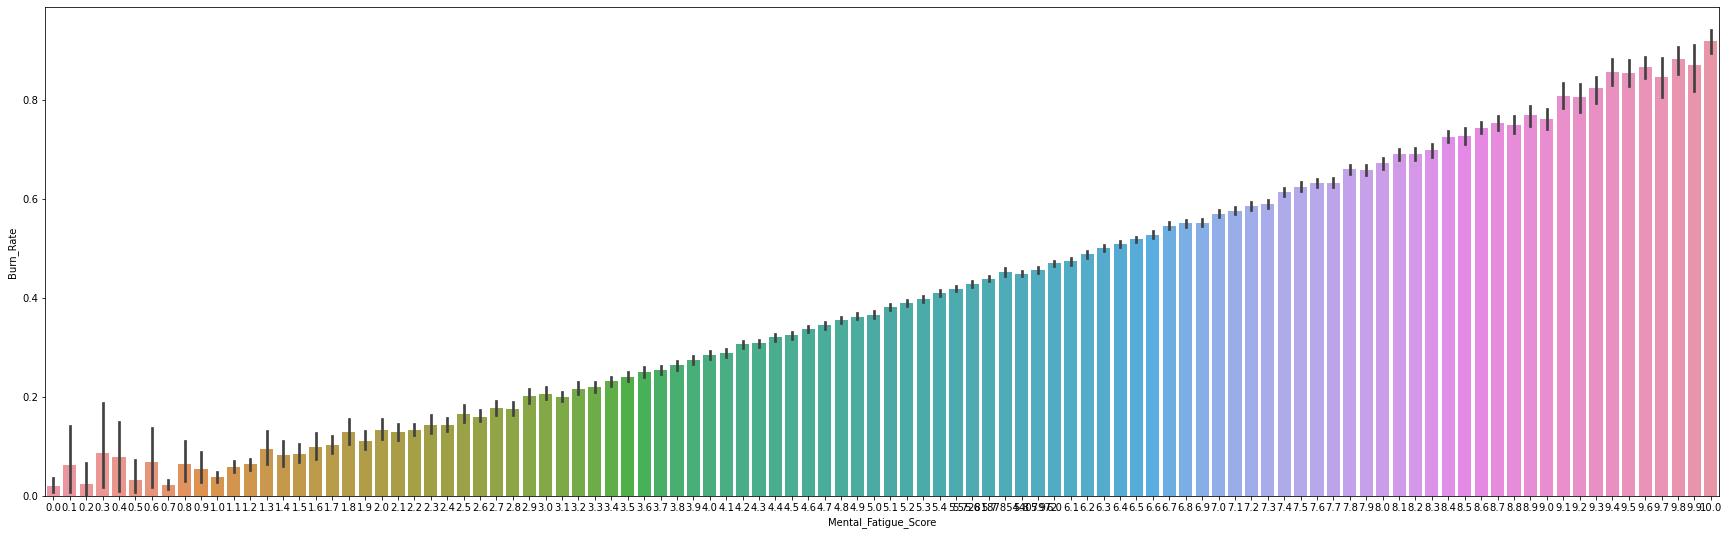

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Designation', y='Burn_Rate', data=df)
plt.show()

sns.barplot(x='Gender', y='Burn_Rate', data=df)
plt.show()

sns.barplot(x='Company_Type', y='Burn_Rate', data=df)
plt.show()

sns.barplot(x='WFH_Setup_Available', y='Burn_Rate', data=df)
plt.show()

plt.figure(figsize=(20,9))
sns.barplot(x='Resource_Allocation', y='Burn_Rate', data=df)
plt.show()


plt.figure(figsize=(30,9))
sns.barplot(x='Mental_Fatigue_Score', y='Burn_Rate', data=df)
plt.show()



In [27]:
#CONVERT CATEGORICAL VALUES WITH NUMERICAL VALUES
df.replace({"Gender":{"Male":1,"Female":0},"Company_Type":{"Product":0,"Service":1},"WFH_Setup_Available":{"No":0,"Yes":1}},inplace=True)

In [28]:
df.head(5)

,Employee ID,Date of Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.000000,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.000000,5.0,0.36
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,4.481398,5.8,0.49
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.000000,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.000000,6.9,0.52


# Dividing the data into features and target 

In [29]:
x=df.drop(columns=["Employee ID","Date of Joining","Burn_Rate"],axis=1)
x

,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score
0,0,1,0,2.0,3.000000,3.800000
1,1,1,1,1.0,2.000000,5.000000
2,0,0,1,2.0,4.481398,5.800000
3,1,1,1,1.0,1.000000,2.600000
4,0,1,0,3.0,7.000000,6.900000
...,...,...,...,...,...,...
22745,0,1,0,1.0,3.000000,5.728188
22746,0,0,1,3.0,6.000000,6.700000
22747,1,1,1,3.0,7.000000,5.728188
22748,0,1,0,2.0,5.000000,5.900000


In [30]:
y=df["Burn_Rate"]
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn_Rate, Length: 22750, dtype: float64

# Splitting the data into training and testing set 

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(22750, 6)
(18200, 6)
(4550, 6)


In [33]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(22750,)
(18200,)
(4550,)


# Training the model

# 1)Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
#Evaluating trainiong data
x_training_data=lr.predict(x_train)
error_score=metrics.r2_score(y_train,x_training_data)
print("R Squared error:",error_score)

R Squared error: 0.8315771302019436


In [37]:
from sklearn.metrics import mean_absolute_error
y_pred=lr.predict(x_train)
# Assuming y_true contains the true values and y_pred contains the predicted values
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.05768541619226007


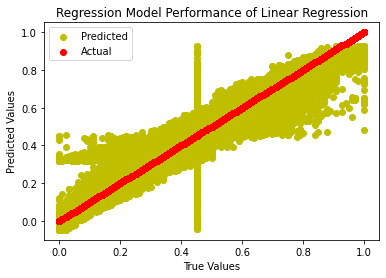

In [38]:
plt.scatter(y_train, y_pred, color='y', label='Predicted')  # Predicted values are plotted in blue
plt.scatter(y_train, y_train, color='r', label='Actual')  # Actual values are plotted in red
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Performance of Linear Regression')
plt.legend()
plt.show()

# 2)LGBM Regressor

LightGBM uses a tree-based learning algorithm and implements a technique called Gradient-based One-Side Sampling (GOSS) for selecting the most informative samples during tree construction. 

LightGBM is a gradient boosting framework developed by Microsoft. It's known for its high efficiency, faster training speed, and ability to handle large datasets. 

In [39]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [40]:
from lightgbm import LGBMRegressor

# Initialize the LGBM Regressor
model = LGBMRegressor()

# Train the model
model.fit(x_train, y_train)


LGBMRegressor()

In [41]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(x_train)
# Assuming y_true contains the true values and y_pred contains the predicted values
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.05033546839349793


In [42]:
#Evaluating trainiong data
x_training_data=model.predict(x_train)
error_score=metrics.r2_score(y_train,x_training_data)
print("R Squared error:",error_score)

R Squared error: 0.8767563666055506


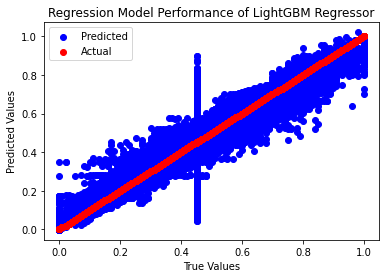

In [43]:
plt.scatter(y_train, y_pred, color='b', label='Predicted')  # Predicted values are plotted in blue
plt.scatter(y_train, y_train, color='r', label='Actual')  # Actual values are plotted in red
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Performance of LightGBM Regressor')
plt.legend()
plt.show()

# 3)CatBoostRegressor

CatBoost is a gradient boosting algorithm developed by Yandex. It stands for "Categorical Boosting" as it handles categorical features naturally without requiring explicit preprocessing steps. CatBoost uses an ordered boosting algorithm and incorporates advanced techniques such as gradient-based one-hot encoding, an innovative gradient-boosting scheme, and a novel learning rate schedule. It provides excellent performance and is robust against overfitting.

In [44]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
from catboost import CatBoostRegressor

# Initialize the CatBoost Regressor
model = CatBoostRegressor()

# Train the model
model.fit(x_train, y_train)

Learning rate set to 0.064755
0:	learn: 0.1846323	total: 131ms	remaining: 2m 11s
1:	learn: 0.1757528	total: 137ms	remaining: 1m 8s
2:	learn: 0.1675684	total: 142ms	remaining: 47.3s
3:	learn: 0.1598676	total: 147ms	remaining: 36.5s
4:	learn: 0.1527522	total: 149ms	remaining: 29.6s
5:	learn: 0.1461281	total: 151ms	remaining: 25s
6:	learn: 0.1399929	total: 153ms	remaining: 21.7s
7:	learn: 0.1342510	total: 155ms	remaining: 19.2s
8:	learn: 0.1289415	total: 157ms	remaining: 17.3s
9:	learn: 0.1242348	total: 159ms	remaining: 15.7s
10:	learn: 0.1198717	total: 161ms	remaining: 14.5s
11:	learn: 0.1158660	total: 163ms	remaining: 13.5s
12:	learn: 0.1121316	total: 165ms	remaining: 12.6s
13:	learn: 0.1087802	total: 168ms	remaining: 11.8s
14:	learn: 0.1057086	total: 170ms	remaining: 11.1s
15:	learn: 0.1027871	total: 172ms	remaining: 10.5s
16:	learn: 0.1002241	total: 174ms	remaining: 10s
17:	learn: 0.0977646	total: 176ms	remaining: 9.58s
18:	learn: 0.0956087	total: 177ms	remaining: 9.16s
19:	learn: 0.0

171:	learn: 0.0699817	total: 485ms	remaining: 2.33s
172:	learn: 0.0699616	total: 487ms	remaining: 2.33s
173:	learn: 0.0699433	total: 489ms	remaining: 2.32s
174:	learn: 0.0699340	total: 491ms	remaining: 2.31s
175:	learn: 0.0699238	total: 493ms	remaining: 2.31s
176:	learn: 0.0699098	total: 495ms	remaining: 2.3s
177:	learn: 0.0698921	total: 497ms	remaining: 2.3s
178:	learn: 0.0698817	total: 499ms	remaining: 2.29s
179:	learn: 0.0698741	total: 502ms	remaining: 2.28s
180:	learn: 0.0698581	total: 504ms	remaining: 2.28s
181:	learn: 0.0698495	total: 508ms	remaining: 2.28s
182:	learn: 0.0698414	total: 509ms	remaining: 2.27s
183:	learn: 0.0698335	total: 511ms	remaining: 2.27s
184:	learn: 0.0698221	total: 514ms	remaining: 2.26s
185:	learn: 0.0698113	total: 516ms	remaining: 2.26s
186:	learn: 0.0697984	total: 518ms	remaining: 2.25s
187:	learn: 0.0697885	total: 520ms	remaining: 2.25s
188:	learn: 0.0697796	total: 522ms	remaining: 2.24s
189:	learn: 0.0697710	total: 524ms	remaining: 2.23s
190:	learn: 0.

338:	learn: 0.0685094	total: 829ms	remaining: 1.62s
339:	learn: 0.0685015	total: 832ms	remaining: 1.61s
340:	learn: 0.0684965	total: 834ms	remaining: 1.61s
341:	learn: 0.0684926	total: 836ms	remaining: 1.61s
342:	learn: 0.0684885	total: 838ms	remaining: 1.6s
343:	learn: 0.0684847	total: 840ms	remaining: 1.6s
344:	learn: 0.0684729	total: 843ms	remaining: 1.6s
345:	learn: 0.0684652	total: 846ms	remaining: 1.6s
346:	learn: 0.0684599	total: 848ms	remaining: 1.59s
347:	learn: 0.0684545	total: 851ms	remaining: 1.59s
348:	learn: 0.0684498	total: 853ms	remaining: 1.59s
349:	learn: 0.0684450	total: 855ms	remaining: 1.59s
350:	learn: 0.0684392	total: 856ms	remaining: 1.58s
351:	learn: 0.0684354	total: 859ms	remaining: 1.58s
352:	learn: 0.0684296	total: 861ms	remaining: 1.58s
353:	learn: 0.0684243	total: 863ms	remaining: 1.57s
354:	learn: 0.0684197	total: 865ms	remaining: 1.57s
355:	learn: 0.0684140	total: 867ms	remaining: 1.57s
356:	learn: 0.0684098	total: 870ms	remaining: 1.57s
357:	learn: 0.06

507:	learn: 0.0677116	total: 1.18s	remaining: 1.15s
508:	learn: 0.0677076	total: 1.19s	remaining: 1.14s
509:	learn: 0.0677051	total: 1.19s	remaining: 1.14s
510:	learn: 0.0677024	total: 1.19s	remaining: 1.14s
511:	learn: 0.0676998	total: 1.19s	remaining: 1.14s
512:	learn: 0.0676952	total: 1.19s	remaining: 1.13s
513:	learn: 0.0676896	total: 1.2s	remaining: 1.13s
514:	learn: 0.0676863	total: 1.2s	remaining: 1.13s
515:	learn: 0.0676833	total: 1.2s	remaining: 1.12s
516:	learn: 0.0676805	total: 1.2s	remaining: 1.12s
517:	learn: 0.0676770	total: 1.2s	remaining: 1.12s
518:	learn: 0.0676749	total: 1.2s	remaining: 1.12s
519:	learn: 0.0676710	total: 1.21s	remaining: 1.11s
520:	learn: 0.0676667	total: 1.21s	remaining: 1.11s
521:	learn: 0.0676640	total: 1.21s	remaining: 1.11s
522:	learn: 0.0676548	total: 1.21s	remaining: 1.1s
523:	learn: 0.0676502	total: 1.21s	remaining: 1.1s
524:	learn: 0.0676444	total: 1.22s	remaining: 1.1s
525:	learn: 0.0676408	total: 1.22s	remaining: 1.1s
526:	learn: 0.0676387	

678:	learn: 0.0671052	total: 1.53s	remaining: 722ms
679:	learn: 0.0671029	total: 1.53s	remaining: 720ms
680:	learn: 0.0671011	total: 1.53s	remaining: 717ms
681:	learn: 0.0670974	total: 1.53s	remaining: 715ms
682:	learn: 0.0670961	total: 1.53s	remaining: 713ms
683:	learn: 0.0670929	total: 1.54s	remaining: 711ms
684:	learn: 0.0670852	total: 1.54s	remaining: 709ms
685:	learn: 0.0670808	total: 1.54s	remaining: 706ms
686:	learn: 0.0670773	total: 1.54s	remaining: 704ms
687:	learn: 0.0670752	total: 1.55s	remaining: 702ms
688:	learn: 0.0670712	total: 1.55s	remaining: 699ms
689:	learn: 0.0670668	total: 1.55s	remaining: 697ms
690:	learn: 0.0670635	total: 1.55s	remaining: 695ms
691:	learn: 0.0670583	total: 1.55s	remaining: 692ms
692:	learn: 0.0670507	total: 1.56s	remaining: 690ms
693:	learn: 0.0670469	total: 1.56s	remaining: 688ms
694:	learn: 0.0670421	total: 1.56s	remaining: 685ms
695:	learn: 0.0670351	total: 1.56s	remaining: 683ms
696:	learn: 0.0670320	total: 1.57s	remaining: 681ms
697:	learn: 

851:	learn: 0.0666071	total: 1.89s	remaining: 328ms
852:	learn: 0.0666050	total: 1.89s	remaining: 325ms
853:	learn: 0.0666029	total: 1.89s	remaining: 323ms
854:	learn: 0.0666009	total: 1.89s	remaining: 321ms
855:	learn: 0.0665969	total: 1.89s	remaining: 319ms
856:	learn: 0.0665945	total: 1.9s	remaining: 316ms
857:	learn: 0.0665908	total: 1.9s	remaining: 314ms
858:	learn: 0.0665842	total: 1.9s	remaining: 312ms
859:	learn: 0.0665813	total: 1.9s	remaining: 310ms
860:	learn: 0.0665782	total: 1.9s	remaining: 307ms
861:	learn: 0.0665749	total: 1.91s	remaining: 305ms
862:	learn: 0.0665734	total: 1.91s	remaining: 303ms
863:	learn: 0.0665714	total: 1.91s	remaining: 301ms
864:	learn: 0.0665698	total: 1.91s	remaining: 298ms
865:	learn: 0.0665627	total: 1.91s	remaining: 296ms
866:	learn: 0.0665599	total: 1.92s	remaining: 294ms
867:	learn: 0.0665572	total: 1.92s	remaining: 292ms
868:	learn: 0.0665540	total: 1.92s	remaining: 289ms
869:	learn: 0.0665521	total: 1.92s	remaining: 287ms
870:	learn: 0.066

In [46]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(x_train)
# Assuming y_true contains the true values and y_pred contains the predicted values
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.0493342841236395


In [47]:
#Evaluating trainiong data
x_training_data=model.predict(x_train)
error_score=metrics.r2_score(y_train,x_training_data)
print("R Squared error:",error_score)

R Squared error: 0.8837527550310653


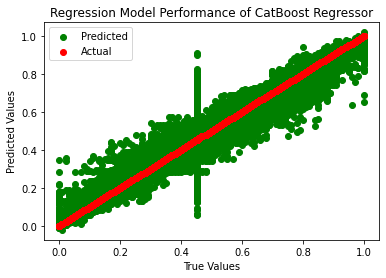

In [48]:
import matplotlib.pyplot as plt

# Assuming y_true contains the true values and y_pred contains the predicted values
plt.scatter(y_train, y_pred, color='g', label='Predicted')  # Predicted values are plotted in blue
plt.scatter(y_train, y_train, color='r', label='Actual')  # Actual values are plotted in red
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Performance of CatBoost Regressor')
plt.legend()
plt.show()


# Building a Predictive System

In [49]:
input_data=(0,1,0,2.0,3.000000,3.800000)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("The burn Rate of the given Employee is:",prediction)

The burn Rate of the given Employee is: [0.25121491]


# Saving the Trained Model

In [50]:
import pickle

In [51]:
filename="EmployeeBurnOutData_model.sav"
pickle.dump(lr,open(filename,'wb'))

In [52]:
#loading the saved model
loaded_model=pickle.load(open("EmployeeBurnOutData_model.sav",'rb'))

In [53]:
input_data=(0,1,0,2.0,3.000000,3.800000)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("The burn Rate of the given Employee is:",prediction)

The burn Rate of the given Employee is: [0.25121491]
